In [69]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [70]:
#load and read the data
df=pd.read_csv('C:\\Users\\Shweta\\Downloads\\datasets\\MLE-Assignment.csv')
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


## EXPLORATION

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [72]:
#Check for null values
df.isnull().sum().sum()

np.int64(0)

In [73]:
# summary statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [74]:
# Drop the 'hsi_id' column as it's not useful for modeling
df_clean = df.drop(columns=['hsi_id'])

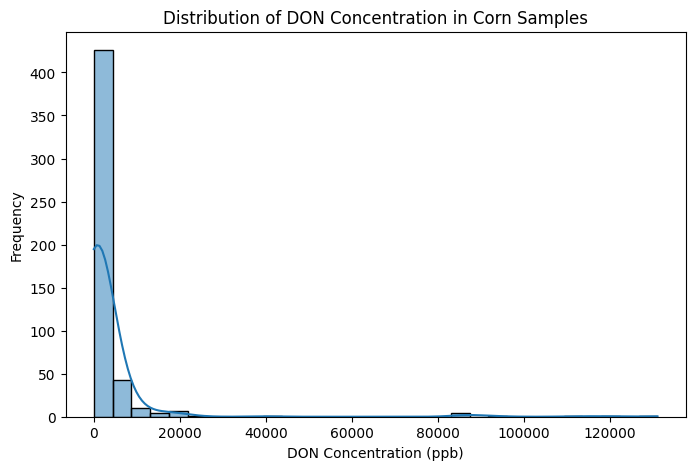

In [75]:
# Plot distribution of target variable (vomitoxin_ppb)
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['vomitoxin_ppb'], bins=30, kde=True)
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of DON Concentration in Corn Samples")
plt.show()

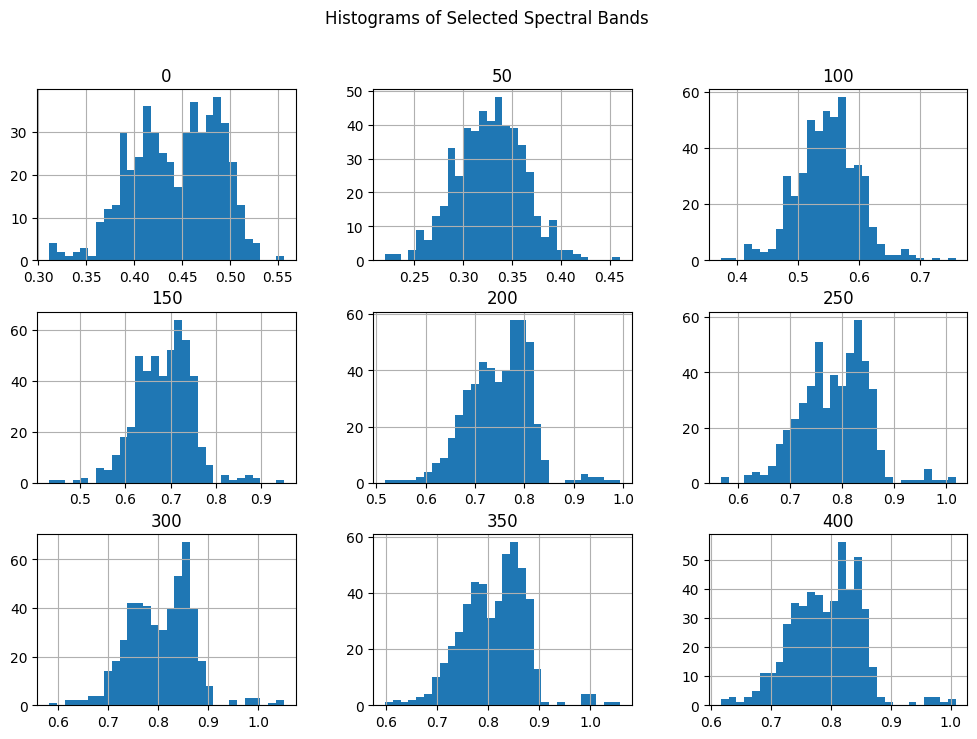

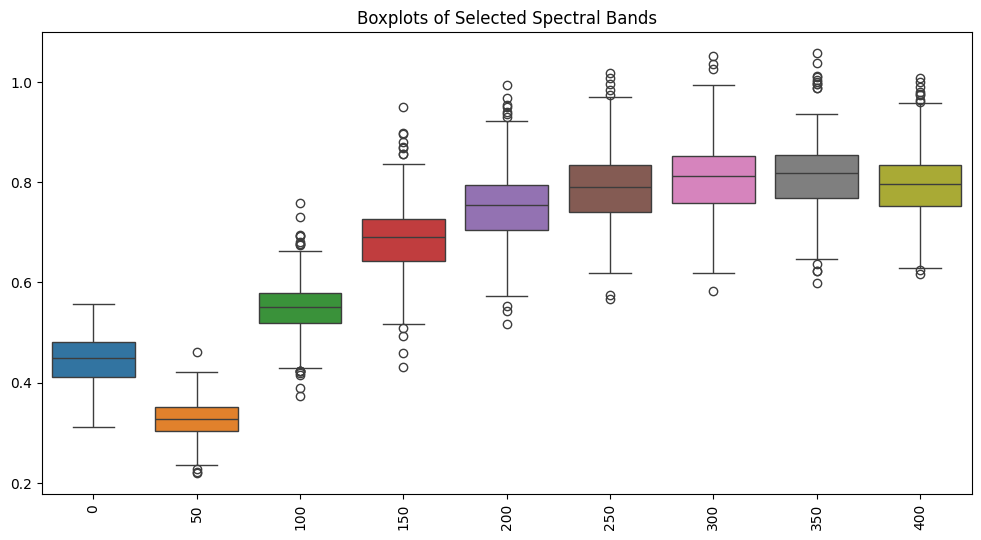

In [76]:
# Histogram & Boxplots of Selected Spectral Bands 
selected_bands = df_clean.columns[::50]  # Pick every 50th band to avoid clutter
df_clean[selected_bands].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Selected Spectral Bands")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[selected_bands])
plt.xticks(rotation=90)
plt.title("Boxplots of Selected Spectral Bands")
plt.show()

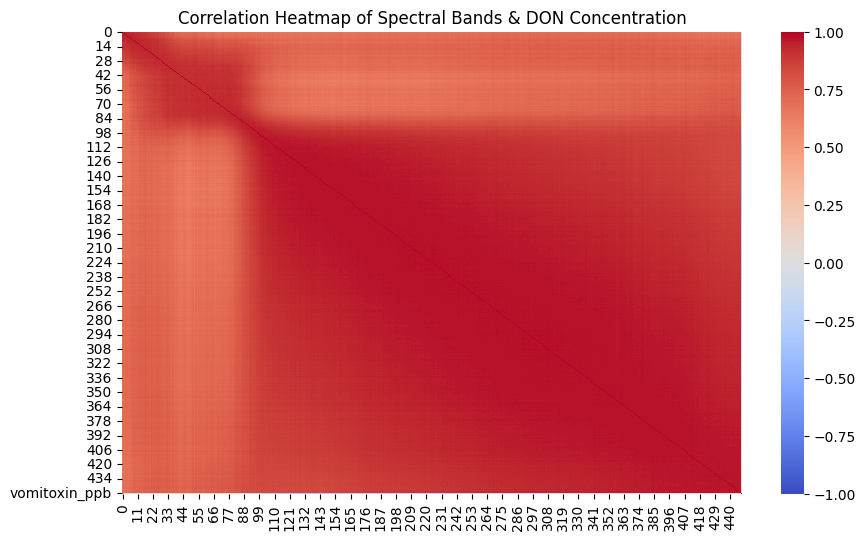

In [77]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Spectral Bands & DON Concentration")
plt.show()

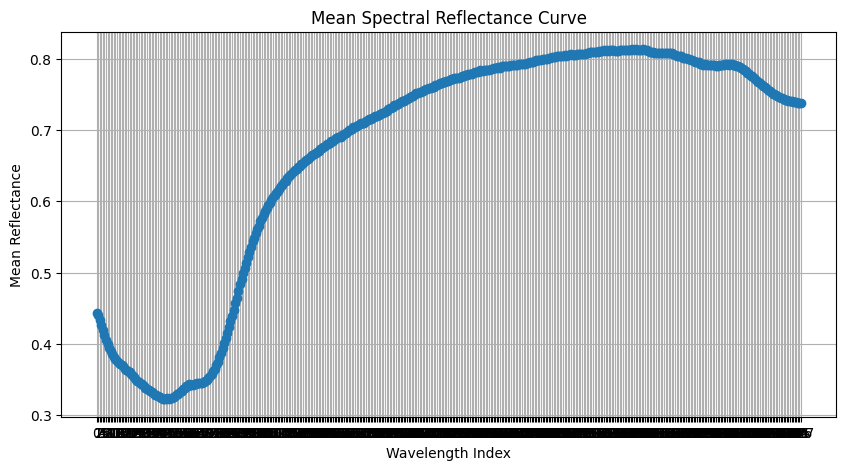

In [78]:
# Mean Spectral Curve
wavelengths = df_clean.columns[:-1]  # Exclude target column
mean_spectrum = df_clean[wavelengths].mean()

plt.figure(figsize=(10, 5))
plt.plot(wavelengths, mean_spectrum, marker="o", linestyle="-")
plt.xlabel("Wavelength Index")
plt.ylabel("Mean Reflectance")
plt.title("Mean Spectral Reflectance Curve")
plt.grid()
plt.show()

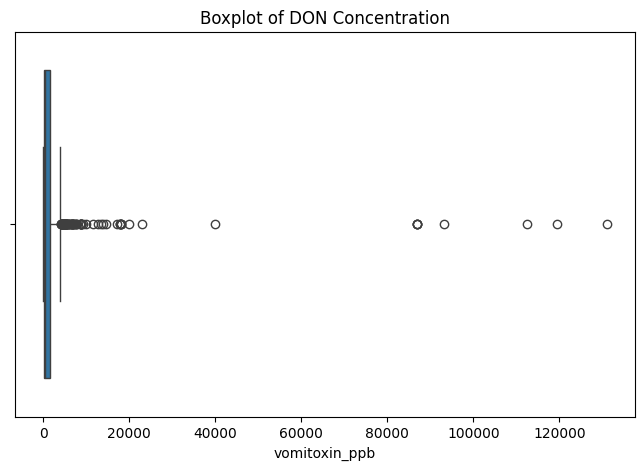

In [79]:
# Outlier Detection in DON Concentration
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['vomitoxin_ppb'])
plt.title("Boxplot of DON Concentration")
plt.show()

## Observations:
1. The dataset has a total 500 entries and 450 columns with 1 being a unique identifier for each record.
2. It has no null values.
3. All the columns are mostly in range of 0.2 to 0.9 except for the target column 'vomitoxin_ppb' which starts from 0 and goes upto 131000(indicating extreme outliers).
4. the target column is highly skewed with some extreme values.
### Next step:
1. Normalize the spectral data (min-max scaling or standardization).
2. Handle outliers in vomitoxin_ppb (log transformation or removal).
3. Visualize spectral reflectance trends across samples.

In [80]:
# Removing extreme outliers
df_clean = df_clean[df_clean['vomitoxin_ppb'] < 200000]
df_clean.shape

(500, 449)

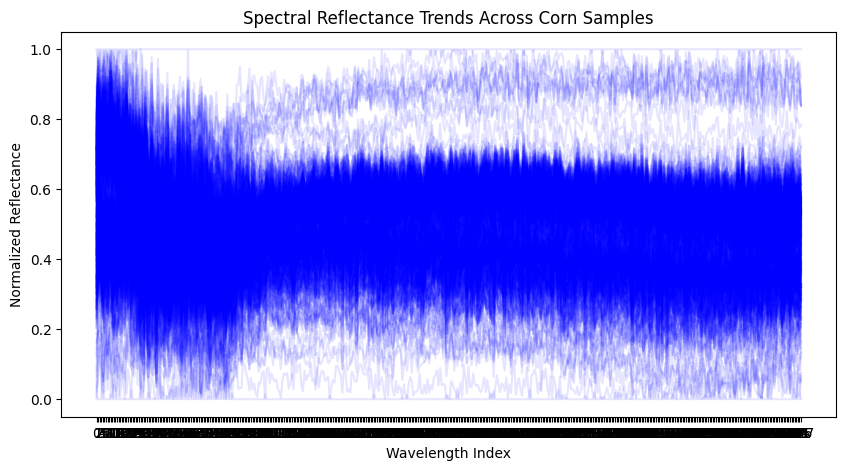

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.428384,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.390543,0.372789,0.411477,0.372650,0.330556,0.324067,0.376234,0.340562,0.359537,7.003974
1,0.426816,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.321045,0.315913,0.377114,0.346713,0.342318,0.282899,0.335534,0.337359,0.320439,6.908755
2,0.317584,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.318514,0.237159,0.275166,0.291190,0.275842,0.225416,0.228563,0.265252,0.260075,7.170888
3,0.643212,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.476533,0.410269,0.468494,0.441426,0.479585,0.446448,0.463770,0.501336,0.432737,7.170888
4,0.702433,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.549142,0.529060,0.533219,0.534680,0.509626,0.461215,0.556841,0.517629,0.479541,5.398163


In [81]:
from sklearn.preprocessing import MinMaxScaler

# Normalize spectral features (MinMax Scaling: 0 to 1)
scaler = MinMaxScaler()
spectral_features = df_clean.drop(columns=['vomitoxin_ppb'])  # Exclude target variable

df_clean[spectral_features.columns] = scaler.fit_transform(spectral_features)

# Log-transform the target variable to reduce skewness
df_clean['vomitoxin_ppb'] = np.log1p(df_clean['vomitoxin_ppb'])

# Visualize spectral reflectance trends across samples
plt.figure(figsize=(10, 5))
plt.plot(df_clean.drop(columns=['vomitoxin_ppb']).T, alpha=0.1, color='blue')
plt.xlabel("Wavelength Index")
plt.ylabel("Normalized Reflectance")
plt.title("Spectral Reflectance Trends Across Corn Samples")
plt.show()

df_clean.head()


## Model building

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

(mae_rf, rmse_rf, r2_rf)


(np.float64(2700.2230967252954),
 np.float64(9095.391086735124),
 0.7040560306690364)

## Hyperparameter tuning

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt'], 
}


# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to test
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Best parameters & model performance
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", random_search.best_params_)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
MAE: 3500.4011, RMSE: 10412.3794, R² Score: 0.6121


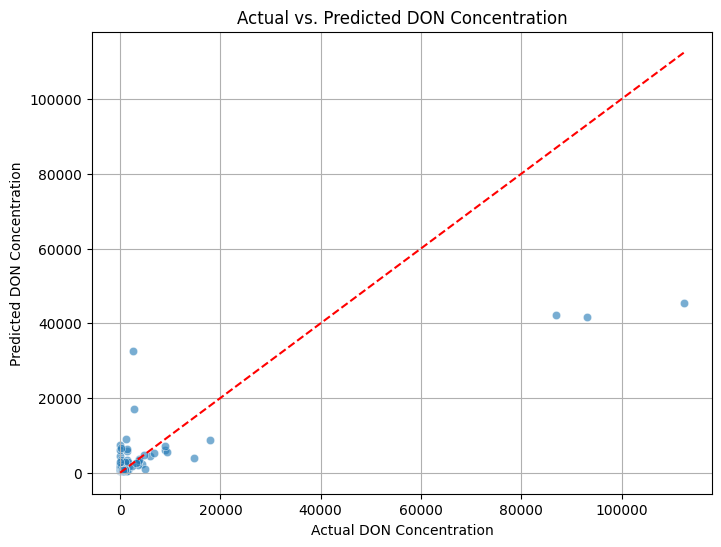

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot a perfect prediction reference line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs. Predicted DON Concentration")
plt.grid(True)

# Show plot
plt.show()


 93%|=================== | 93/100 [00:13<00:00]       

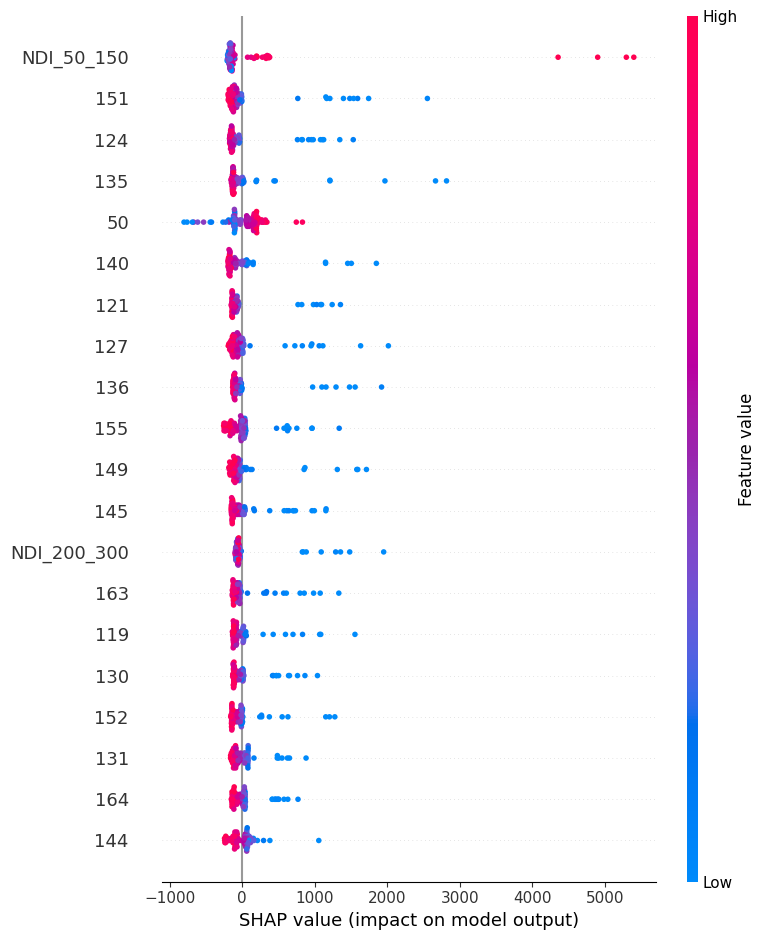

In [83]:
#
import shap
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
